# Trabalho de Linguagem de Programação Aplicada (LPA) - IAA002
#### Por: Bruno Galvão, Walter José Horning Junior

In [65]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configurando o pandas para não exibir dados em notação científica ( campos com valores muito grandes [métricas - 3.G])
pd.set_option('display.float_format', lambda x: '%.6f' % x)

import warnings
warnings.filterwarnings('ignore')

### 1.A

Carregue a base de dados media_precos_carros_brasil.csv

In [66]:
# Substitua pelo caminho para a sua base de dados (.csv)
file_path = './data/'
# Lendo o csv
df = pd.read_csv(f'{file_path}precos_carros_brasil.csv')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.000000,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.000000,9162.000000
1,2021.000000,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.000000,8832.000000
2,2021.000000,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.000000,8388.000000
3,2021.000000,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.000000,8453.000000
4,2021.000000,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.000000,12525.000000


In [67]:
# Listando count de linhas e colunas de df
df.shape

(267542, 11)

### 1.B

Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [68]:
# Verificando se existe algum valor faltando em df
df.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [69]:
# Total de valores faltando por coluna em df
df.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [70]:
# Excluindo as linhas em que todos os valores são nulos
df = df.dropna(how='all')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.000000,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.000000,9162.000000
1,2021.000000,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.000000,8832.000000
2,2021.000000,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.000000,8388.000000
3,2021.000000,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.000000,8453.000000
4,2021.000000,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.000000,12525.000000


In [71]:
# Verificando se ainda existe algum valor faltando
df.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

### 1.C

Verifique se há dados duplicados nos dados


In [72]:
# Verificando se existe alguma duplicata
df.duplicated().any()

True

In [73]:
# Verificando quantas existem
df.duplicated().sum()

2

### 1.D
Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [74]:
# Verificando tipos
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [75]:
# Separando em categóricos e numéricos
dados_categoricos = df.select_dtypes(include=['object'])
dados_numericos = df.select_dtypes(exclude=['object'])

In [76]:
dados_categoricos.head()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
1,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
2,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
3,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1
4,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6"


In [77]:
dados_numericos.head()

,year_of_reference,year_model,avg_price_brl
0,2021.000000,2002.000000,9162.000000
1,2021.000000,2001.000000,8832.000000
2,2021.000000,2000.000000,8388.000000
3,2021.000000,2000.000000,8453.000000
4,2021.000000,2001.000000,12525.000000


In [78]:
# Gerando estatísticas descritivas dos dados categóricos
dados_categoricos.describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


In [79]:
# Gerando estatísticas descritivas dos dados numéricos
dados_numericos.describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


### 1.E
Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [80]:
# Separando por modelo e marca e imprimindo na tela
dados_categoricos[['brand','model']].value_counts()

brand            model                                 
Fiat             Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Ford             Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
                 Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
VW - VolksWagen  Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
                 Golf 2.0/ 2.0 Mi Flex Aut/Tiptronic.      375
                                                          ... 
Fiat             PULSE ABARTH 1.3 Turbo 16V Flex Aut.        2
VW - VolksWagen  Polo Track 1.0 Flex 12V 5p                  2
Renault          STEPWAY Zen Flex 1.0 12V Mec.               2
VW - VolksWagen  Gol Last Edition 1.0 Flex 12V 5p            2
Nissan           KICKS Active 1.6 16V Flex Aut.              2
Name: count, Length: 2112, dtype: int64

In [81]:
# Separando por modelo e imprimindo na tela
dados_categoricos['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [82]:
# Separando por marca e imprimindo na tela
dados_categoricos['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64

### 1.F
Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

O dataset possui 11 colunas e 267542 linhas, porém 65245 linhas são nulas, das quais 2 são duplicadas. Essas observações contemplam 2112 modelos de carros diferentes, dentre as 6 marcas existentes no dataset. A média de preço de todos os carros é de 52.756,90, variando de 6.647,00 até 979.358,00, com mediana de 38.027,00 (BRL).

_______

### 2.A
Gere um gráfico da distribuição da quantidade de carros por marca

Text(0, 0.5, 'Quantidade de carros')

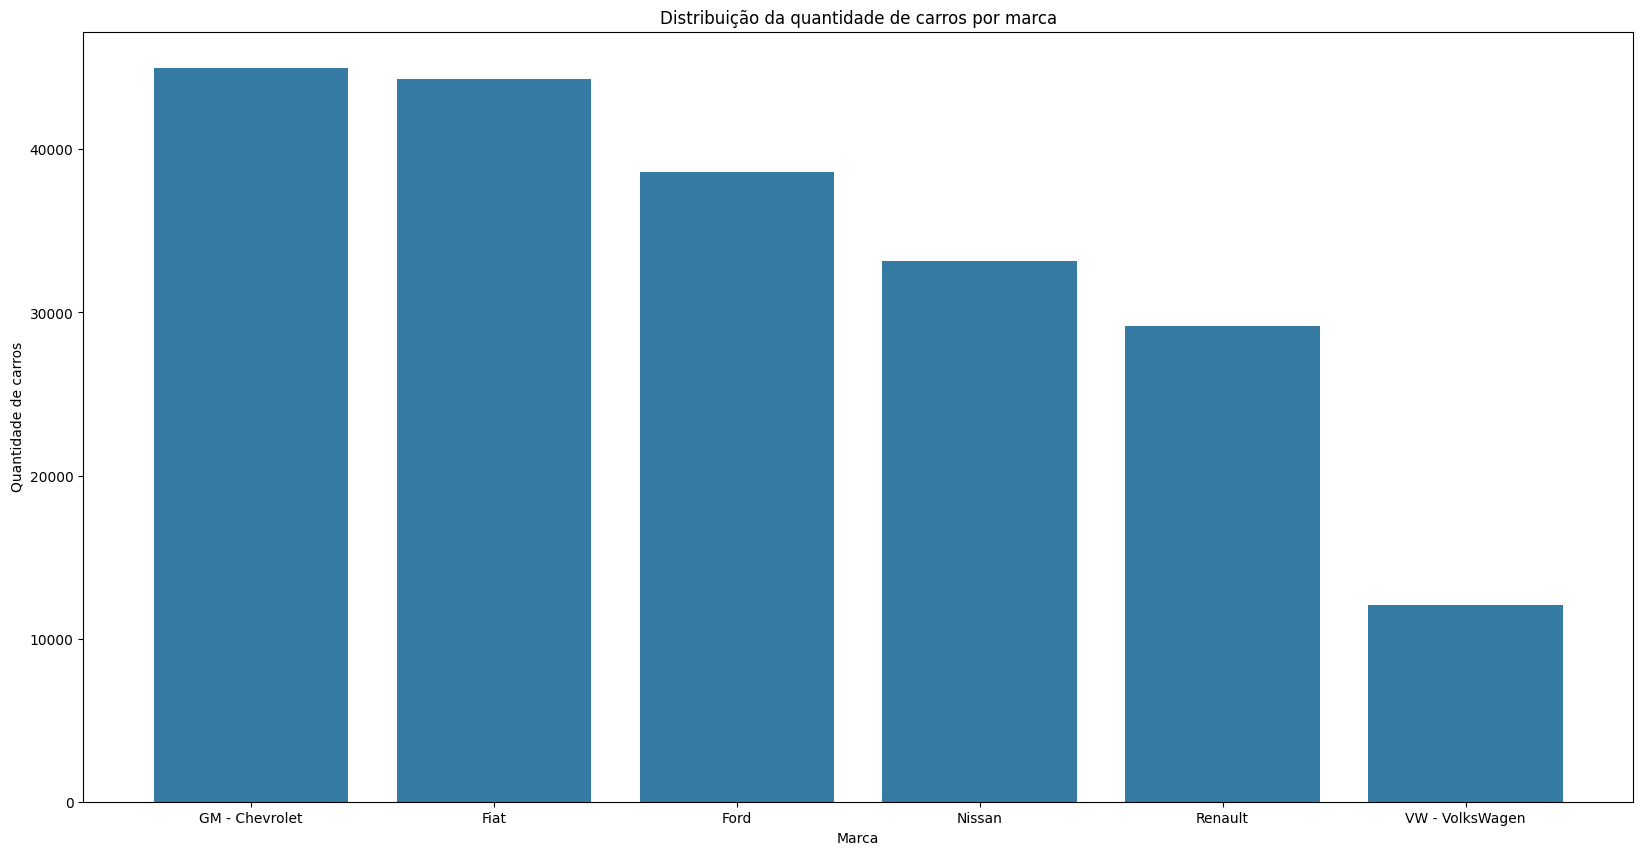

In [83]:
# Usando a biblioteca MatplotLib
# Definindo tamanho do gráfico
plt.figure(figsize=(20,10))
# Definindo a paletta de cores usando seaborn
palette = sns.color_palette("mako", 1)
# Plotando
plt.bar(df['brand'].unique(), df['brand'].value_counts(), color=palette)
# Inserindo título
plt.title('Distribuição da quantidade de carros por marca')
# Ajustando labels
plt.xlabel('Marca')
plt.ylabel('Quantidade de carros')

### 2.B

Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

Text(0, 0.5, 'Quantidade de carros')

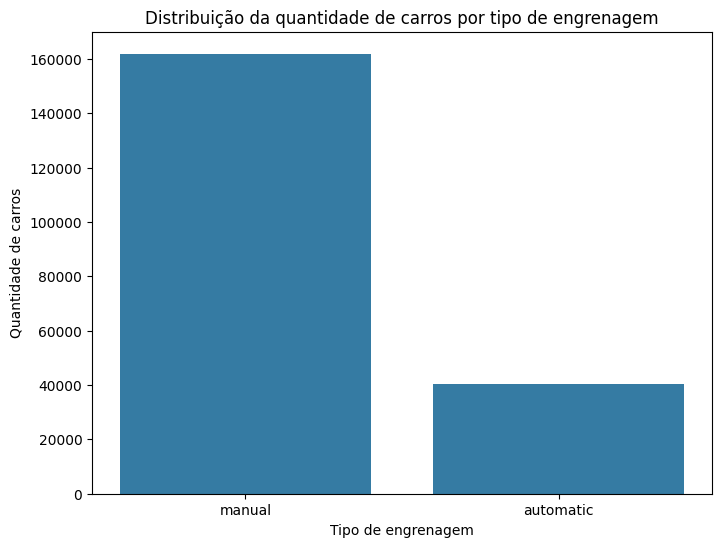

In [84]:
# Definindo tamanho do gráfico
plt.figure(figsize=(8,6))
# Definindo a paletta de cores usando seaborn
palette = sns.color_palette("mako", 1)
# Plotando
plt.bar(df['gear'].unique(), df['gear'].value_counts(), color=palette)
# Inserindo título
plt.title('Distribuição da quantidade de carros por tipo de engrenagem')
# Ajustando as labels
plt.xlabel('Tipo de engrenagem')
plt.ylabel('Quantidade de carros')

### 2.C

Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [85]:
# Função usada para ajustar a ordem dos meses para plotar no gráfico. 
def set_order(order):
    dict_months = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }

    return dict_months[order]

In [86]:
# Filtrando os dados apenas para o ano de 2022
df_2022 = df[df['year_of_reference'] == 2022]
# Função lambda para criar uma coluna com valores representando os meses (inteiros), para ordenação
df_2022['order'] = df_2022['month_of_reference'].apply(lambda month: set_order(month))

In [87]:
# Agrupamento por mes e ordem (coluna criada para ordenação), e cálculo da média dos preços médios dos carros
df_group = df_2022.groupby(['order', 'month_of_reference'])['avg_price_brl'].mean().reset_index()
# Ordenação dos meses (pela coluna order order)  
df_group = df_group.sort_values(by='order')
df_group.head()

,order,month_of_reference,avg_price_brl
0,1,January,54840.270037
1,2,February,55824.519882
2,3,March,56848.951914
3,4,April,57150.037325
4,5,May,57799.763776


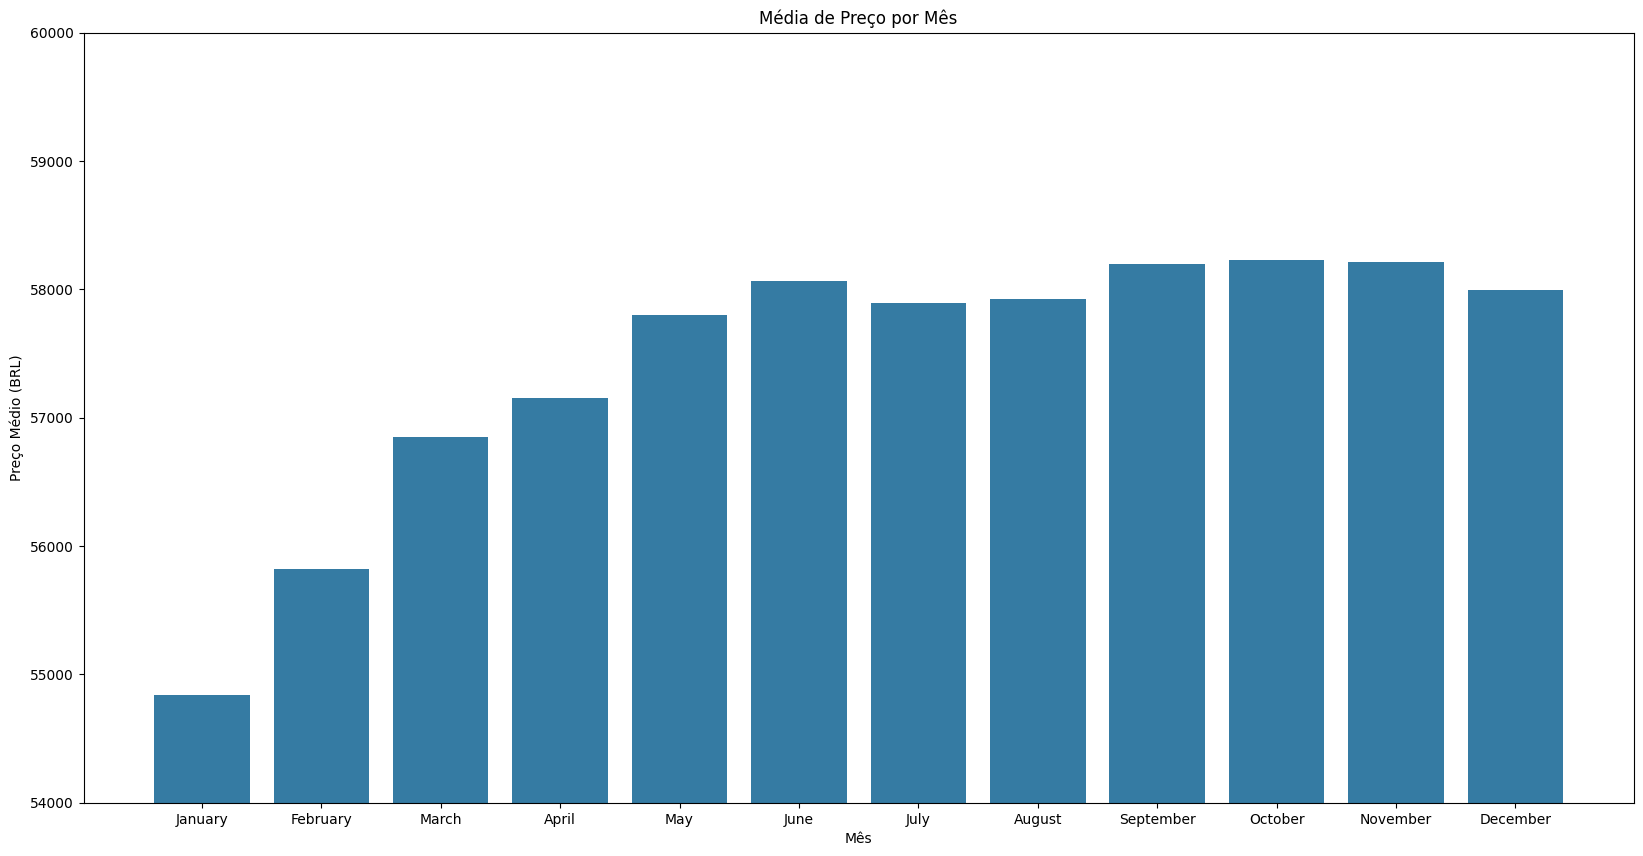

In [88]:
# Plotando o gráfico da evolução da média de preço dos carros ao longo dos meses de 2022
plt.figure(figsize=(20, 10))
# Definindo a paletta de cores usando seaborn
palette = sns.color_palette("mako", 1)
# Mês de referência ordenado no eixo x
plt.bar(df_group['month_of_reference'], df_group['avg_price_brl'], color=palette)
plt.xlabel('Mês')
plt.ylabel('Preço Médio (BRL)')
plt.title('Média de Preço por Mês')
# Limitando o eixo y para melhor visualização da evolução da média
plt.ylim(54000, 60000)
plt.show()

### 2.D

Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

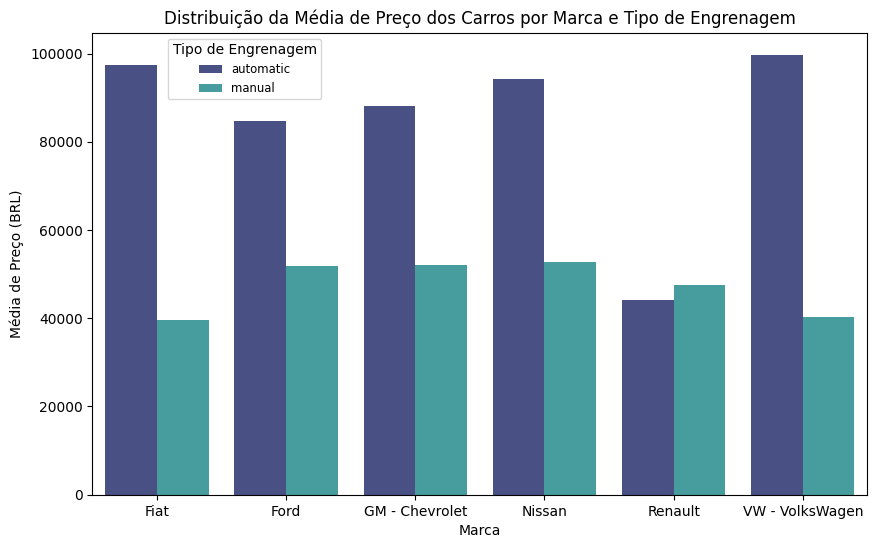

In [89]:
# Agrupando por marca e tipo de engrenagem e calculando a média dos preços médios
media_preco_por_marca_engrenagem = df.groupby(['brand', 'gear'])['avg_price_brl'].mean().reset_index()

# Criando o gráfico de distribuição da média de preço dos carros por marca e tipo de engrenagem 
plt.figure(figsize=(10, 6))
# Plotagem usando Seaborn
sns.barplot(x='brand', y='avg_price_brl', hue='gear', data=media_preco_por_marca_engrenagem, palette='mako')
plt.title('Distribuição da Média de Preço dos Carros por Marca e Tipo de Engrenagem')
plt.xlabel('Marca')
plt.ylabel('Média de Preço (BRL)')
# Adiciona e ajusta a legenda. 'bbox_to_anchor' é usado para evitar sobreposição
plt.legend(loc='upper left', bbox_to_anchor=(0.09, 1), title='Tipo de Engrenagem', fontsize='small')
plt.show()

### 2.E

Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

Em quase todas as marcas (com exceção da Renault), os carros com engrenagem automática tendem a ser mais caros do que os carros com engrenagem manual. Pode-se perceber também que a Ford, GM - Chevrolet e Nissan possuem uma média de preço parecida para carros com engrenagem manual.

### 2.F

Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

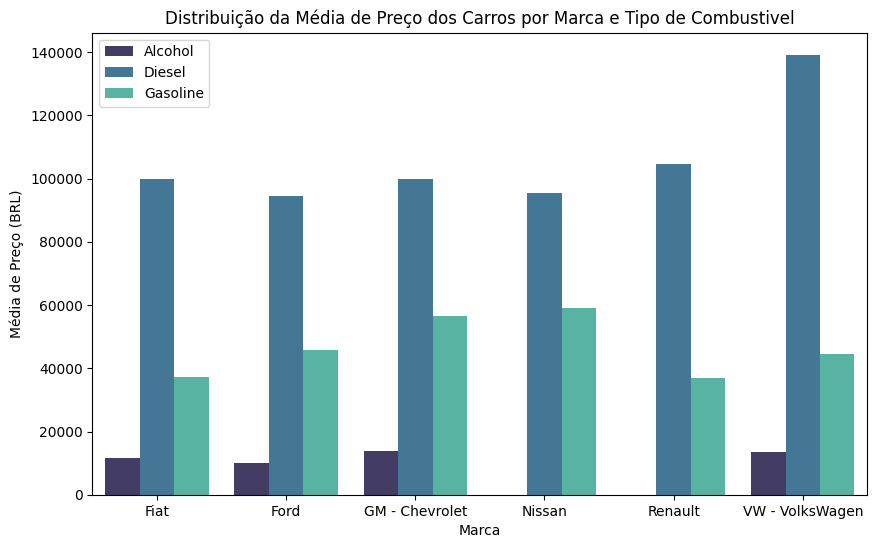

In [90]:
# Agrupando marca e combustível e calculando a média dos preços médios dos carros
df_group = df.groupby(['brand', 'fuel'])['avg_price_brl'].mean().reset_index()

# Setando configurações e plotando usando a biblioteca Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='avg_price_brl', hue='fuel', data=df_group, palette='mako')
plt.title('Distribuição da Média de Preço dos Carros por Marca e Tipo de Combustivel')
plt.xlabel('Marca')
plt.ylabel('Média de Preço (BRL)')
plt.legend(title='Tipo de Engrenagem')
plt.legend(loc='upper left')
plt.show()

### 2.G

Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f


As marcas Nissan e Renault não apresentaram nenhum carro movido à álcool neste dataset. A média dos preços dos carros que usam álcool é muito menor, comparado aos outros. Existe uma substancial diferença entre a média dos preços para gasolina e diesel. Enquanto a maior média para gasolina é ~60.000, a do diesel é ~140.000 (2,5 vezes maior).

____________________________________________________________


### 3.A

Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas

In [91]:
# Verificando os tipos das variáveis
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [92]:
# Convertendo 'engine_size' de object para float (trocando , por .)
df['engine_size'] = df['engine_size'].str.replace(',', '.').astype(float)
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model            float64
avg_price_brl         float64
dtype: object

In [93]:
# Convertendo 'year_model' e 'year_of_reference' para inteiro
df['year_model'] = df['year_model'].astype(int)
df['year_of_reference'] = df['year_of_reference'].astype(int)

In [94]:
# Verificando tipos novamente
df.dtypes

year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model              int64
avg_price_brl         float64
dtype: object

In [95]:
# LabelEncoder para transformar gear de categórica para numérica (codificar rótulos em 0 e 1)
df['gear'] = LabelEncoder().fit_transform(df['gear'])
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.000000,2002,9162.000000
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.000000,2001,8832.000000
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.000000,2000,8388.000000
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,1,1.000000,2000,8453.000000
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,1,1.600000,2001,12525.000000


In [96]:
# Separando as variáveis numéricas para os modelos
dados_numericos = df.select_dtypes(exclude=['object'])

In [97]:
# Criando X (variáveis independentes)
X = dados_numericos.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,gear,engine_size,year_model
0,2021,1,1.000000,2002
1,2021,1,1.000000,2001
2,2021,1,1.000000,2000
3,2021,1,1.000000,2000
4,2021,1,1.600000,2001


In [98]:
# Criando Y (target/variável dependente)
Y = dados_numericos['avg_price_brl']
Y.head()

0    9162.000000
1    8832.000000
2    8388.000000
3    8453.000000
4   12525.000000
Name: avg_price_brl, dtype: float64

### 3.B

Crie partições contendo 75% dos dados para treino e 25% para teste

In [99]:
# Separação usando matplotlib (train_test_split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

### 3.C

Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo 

##### RandomForest

In [100]:
#Instanciando o modelo RandomForest com os parâmetros default
model_rf = RandomForestRegressor()

In [101]:
#Treinando o modelo RandomForest com dados de treino
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [102]:
#Instanciando um novo modelo RandomForest com parâmetros escolhidos
model_rf_par = RandomForestRegressor(n_estimators=50, min_samples_split=7)

In [103]:
#Para esse teste, usamos 2 parâmetros: n_estimators e min_samples_split. Os valores default deles são: 100 e 2 respectivamemnte.
#O primeiro (n_estimators) é número de árvores na floresta. 
#O segundo (min_samples_split) é o número mínimo de amostras que um nó deve ter antes de ser dividido.

In [104]:
#Treinando o modelo RandomForest
model_rf_par.fit(X_train, Y_train)

RandomForestRegressor(min_samples_split=7, n_estimators=50)

##### XGBoost

In [105]:
#Instanciando o modelo XGBoost com parâmetros default
model_xgboost = XGBRegressor()
#Treinando o modelo
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
#Instanciando o modelo XGBoost com parâmetros escolhidos
model_xgboost_par = XGBRegressor(n_estimators=300, gamma=2, max_depth=10)
#Treinando o modelo
model_xgboost_par.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
#Para esse teste, usamos 3 parâmetros: n_estimators, gamma e max_depth. Os valores default deles são: 100, 0, 6, respectivamemnte.
#O primeiro (n_estimators) é o número de árvores de boosting a serem construídas. 
#O segundo (gamma) é valor mínimo de redução de perda necessária para fazer uma divisão adicional em um nó da árvore. 
#O terceiro (max_depth) é a profundidade máxima de uma árvore.

### 3.D 

Grave os valores preditos em variáveis criadas

##### RandomForest

In [108]:
#RandomForest: Com parâmetros default
valores_preditos_rf = model_rf.predict(X_test)
#RandomForest: Com parâmetros escolhidos
valores_preditos_rf_par = model_rf_par.predict(X_test)

##### XGBoost

In [109]:
#XGBoost: Com parâmetros default
valores_preditos_xgb = model_xgboost.predict(X_test)
#XGBoost: Com parâmetros escolhidos
valores_preditos_xgb_par = model_xgboost_par.predict(X_test)

### 3.E

Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado

##### RandomForest

In [110]:
#Análise com parâmetros default
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.519841
year_model,0.426247
gear,0.040345
year_of_reference,0.013567


Para esse modelo as variáveis "year_of_reference" e "gear" têm baixa significância para prever a variável target, pois é muito próxima de 0. As variáveis "engine_size" e "year_model" foram as mais significativas do modelo, tendo maior relevância na regressão.

In [111]:
#Com parâmetros escolhidos
model_rf_par.feature_importances_
feature_importances_par = pd.DataFrame(model_rf_par.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances_par

,importance
engine_size,0.515988
year_model,0.426895
gear,0.043312
year_of_reference,0.013805


Para esse modelo, os resultados foram bem parecidos com o modelo acima. As variáveis "gear" e "year_of_reference" continuam pouco significativas, enquanto "engine_size" e "year_model" explicam a maior parte dos dados.

##### XGBoost

In [112]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.519841
year_model,0.426247
gear,0.040345
year_of_reference,0.013567


Para esse modelo as variáveis "year_of_reference" e "gear" também têm baixa significância para prever a variável target, pois é muito próxima de 0. As variáveis "engine_size" e "year_model" foram as mais significativas do modelo, tendo maior relevância na regressão.

In [113]:
model_rf_par.feature_importances_
feature_importances_par = pd.DataFrame(model_rf_par.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.519841
year_model,0.426247
gear,0.040345
year_of_reference,0.013567


Para esse modelo, os resultados também foram bem parecidos com o modelo acima. As variáveis "gear" e "year_of_reference" continuam pouco significativas, enquanto "engine_size" e "year_model" explicam a maior parte dos dados.

#### 3.F

Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis

Para os quatro modelos, as variáveis "year_of_reference" e "gear" tiveram baixa significância e são candidatas a serem retiradas do modelo. As variáveis "engine_size" e "year_model" foram as mais significativas, com uma leve vantagem de “engine_size”, tendo maior relevância na regressão. A variável “engine_size” explica ~52% dos dados.

#### 3.G

Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

##### RandomForest

###### MSE

In [114]:
# Com parâmetros default
rf_mse = mean_squared_error(Y_test, valores_preditos_rf)

In [115]:
# Com parâmetros escolhidos
rf_mse_p = mean_squared_error(Y_test, valores_preditos_rf_par)

###### MAE

In [116]:
# Com parâmetros default
rf_mae = mean_absolute_error(Y_test, valores_preditos_rf)

In [117]:
# Com parâmetros escolhidos
rf_mae_p = mean_absolute_error(Y_test, valores_preditos_rf_par)

##### R²

In [118]:
rf_r2 = r2_score(Y_test, valores_preditos_rf)

In [119]:
rf_r2_p = r2_score(Y_test, valores_preditos_rf_par)

##### XGBoost

###### MSE

In [120]:
# Com parâmetros default
xgb_mse = mean_squared_error(Y_test, valores_preditos_xgb)

In [121]:
# Com parâmetros escolhidos
xgb_mse_p = mean_squared_error(Y_test, valores_preditos_xgb_par)

###### MAE

In [122]:
# Com parâmetros default
xgb_mae = mean_absolute_error(Y_test, valores_preditos_xgb)

In [123]:
# Com parâmetros escolhidos
xgb_mae_p = mean_absolute_error(Y_test, valores_preditos_xgb_par)

##### R²

In [124]:
xgb_r2 = r2_score(Y_test, valores_preditos_xgb)

##### Resultados

In [125]:
xgb_r2_p = r2_score(Y_test, valores_preditos_xgb_par)

In [126]:
# Gerando dataframes, com os resultados para comparação, por métrica
mse = {
    'Tipo do Modelo': ['RandomForest', 'XGBoost'],
    'Parâmetros Default': [rf_mse, xgb_mse],
    'Parâmetros Escolhidos': [rf_mse_p, xgb_mse_p]
}
df_mse = pd.DataFrame(mse)
df_mse

,Tipo do Modelo,Parâmetros Default,Parâmetros Escolhidos
0,RandomForest,194771204.815192,194059768.736735
1,XGBoost,194799327.379469,196369128.975193


Melhor Modelo (Métrica MSE): RandomForest com parâmetros escolhidos

In [127]:
mae = {
    'Tipo do Modelo': ['RandomForest', 'XGBoost'],
    'Parâmetros Default': [rf_mae, xgb_mae],
    'Parâmetros Escolhidos': [rf_mae_p, xgb_mae_p]
}
df_mae = pd.DataFrame(mae)
df_mae

,Tipo do Modelo,Parâmetros Default,Parâmetros Escolhidos
0,RandomForest,7668.818579,7668.441868
1,XGBoost,7676.477336,7676.971410


Melhor Modelo (Métrica MAE): RandomForest com parâmetros escolhidos

In [128]:
r2 = {
    'Tipo do Modelo': ['RandomForest', 'XGBoost'],
    'Parâmetros Default': [rf_r2, xgb_r2],
    'Parâmetros Escolhidos': [rf_r2_p, xgb_r2_p]
}
df_r2 = pd.DataFrame(r2)
df_r2

,Tipo do Modelo,Parâmetros Default,Parâmetros Escolhidos
0,RandomForest,0.926583,0.926851
1,XGBoost,0.926572,0.925980


Melhor Modelo (Métrica R²): RandomForest com parâmetros escolhidos

#### 3.H

Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor
resultado e a métrica de avaliação utilizada.

RandomForest com parâmetros escolhidos foi o que teve melhor desempenho. Devido a facilidade de interpretação, escolhemos R2, pois dado seu resultado de 0.926572, pode-se dizer que o modelo explica ~92% da variância da variável dependente, a partir das variáveis independentes. Todos os modelos tiveram resultados próximos.
